## Library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import seaborn as sns

## Load the data

In [2]:
df_test = pd.read_csv('''C:/Users/lucas/Documents/lucastiagooliveira/Kaggle/Titanic - Machine Learning disaster/Datasets/test.csv''')
df_train = pd.read_csv('''C:/Users/lucas/Documents/lucastiagooliveira/Kaggle/Titanic - Machine Learning disaster/Datasets/train.csv''')

In [3]:
df_test_old = df_test.copy()
df_train_old = df_train.copy()

In [4]:
combine = [df_train, df_test]

## Visualize the datasets

In [5]:
print(df_train.head().info())
print('_'*40)
print(df_test.head().info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  5 non-null      int64  
 1   Survived     5 non-null      int64  
 2   Pclass       5 non-null      int64  
 3   Name         5 non-null      object 
 4   Sex          5 non-null      object 
 5   Age          5 non-null      float64
 6   SibSp        5 non-null      int64  
 7   Parch        5 non-null      int64  
 8   Ticket       5 non-null      object 
 9   Fare         5 non-null      float64
 10  Cabin        2 non-null      object 
 11  Embarked     5 non-null      object 
dtypes: float64(2), int64(5), object(5)
memory usage: 608.0+ bytes
None
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenge

In [6]:
df_train[['Sex', 'Survived']].groupby(by = 'Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


- It's more likely the female survive

In [7]:
df_train[['Embarked', 'Survived']].groupby(by = 'Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


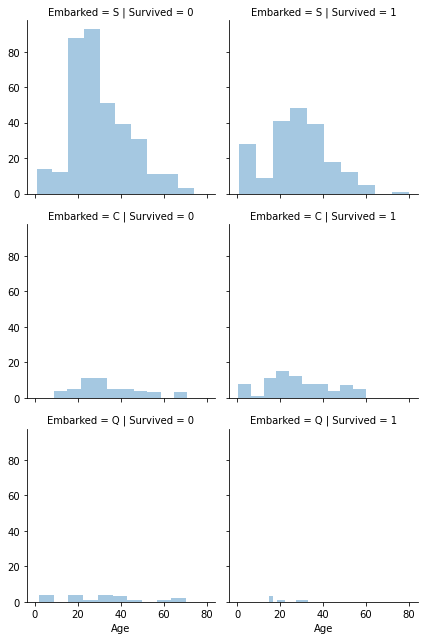

In [8]:
grid = sns.FacetGrid(df_train, row = 'Embarked', col = 'Survived')
grid.map(plt.hist, 'Age', alpha = .4)

C:\Users\lucas\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


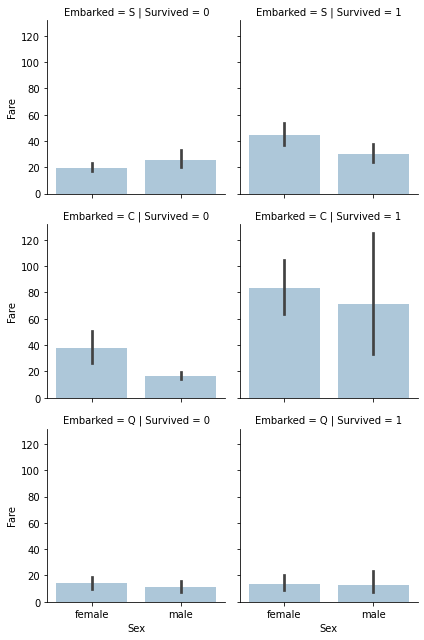

In [9]:
grid = sns.FacetGrid(df_train, row = 'Embarked', col = 'Survived')
grid.map(sns.barplot, 'Sex', 'Fare', alpha = .4)

- we need to use for the model the embarked station and sex

In [10]:
df_train[['Pclass','Survived']].groupby(by = 'Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


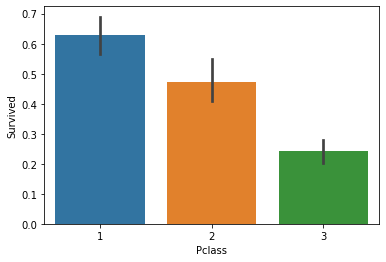

In [11]:
sns.barplot(y = df_train['Survived'], x = df_train['Pclass'], data = df_train)

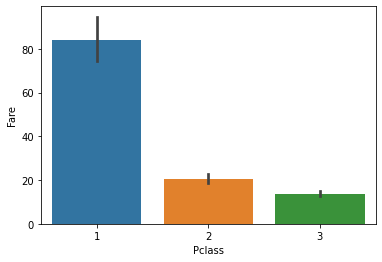

In [12]:
sns.barplot(y = df_train['Fare'], x = df_train['Pclass'], data = df_train)

In [13]:
df_train[['SibSp', 'Survived']].groupby(by = 'SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [14]:
df_train[['Parch', 'Survived']].groupby(by = 'Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


- If the person is alone the have less likely to survive
- If the person have more than 4 parents in bord he likely died

In [15]:
df_train.loc[df_train['Parch'] == 0].loc[df_train['SibSp'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Replace the embarked class to int categorical

In [16]:
for data in combine:
    data['Embarked'] = data['Embarked'].map({'S': 0, 'Q': 1, 'C': 2})

In [17]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0.0


## Modify the encoding of sex

In [18]:
for data in combine:
    data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [19]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


## Create the category isAlone

This category represents the person who was embarked alone

In [20]:
for data in combine:
    isalone = [1 if (data['SibSp'][i] == 0 & data['Parch'][i] == 0) else 0 for i in range(0, data.shape[0])]
    data['isAlone'] = isalone

In [21]:
df_train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.013166,0.053397
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.169718,-0.115867
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.164681,0.076009
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.110320,-0.203203
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,0.032565,0.162893
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,-0.068900,-0.695562
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.040449,-0.356133
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.226311,-0.192190
Embarked,-0.013166,0.169718,-0.164681,0.110320,0.032565,-0.068900,-0.040449,0.226311,1.000000,-0.013810
isAlone,0.053397,-0.115867,0.076009,-0.203203,0.162893,-0.695562,-0.356133,-0.192190,-0.013810,1.000000


## Create the column FamilySize

In [22]:
for data in combine:
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
df_train[['FamilySize','Survived']].groupby(by = 'FamilySize').mean().sort_values(by = 'Survived', ascending = False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


## Create the title feature

In [23]:
titles = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master': 4, 'Rare': 5}

for data in combine:
    data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand=False)
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    data['Title'] = data['Title'].replace(['Mlle','Ms'], 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    data['Title'] = data['Title'].map(titles)
    data['Title'] = data['Title'].fillna(0)

In [24]:
for data in combine:
    data = data.drop(columns = ['PassengerId','Name','SibSp','Parch','Cabin', 'Ticket'], inplace = True)

In [25]:
df_train.corr()

,Survived,Pclass,Sex,Age,Fare,Embarked,isAlone,FamilySize,Title
Survived,1.000000,-0.338481,0.543351,-0.077221,0.257307,0.169718,-0.115867,0.016639,0.407753
Pclass,-0.338481,1.000000,-0.131900,-0.369226,-0.549500,-0.164681,0.076009,0.065997,-0.173929
Sex,0.543351,-0.131900,1.000000,-0.093254,0.182333,0.110320,-0.203203,0.200988,0.502713
Age,-0.077221,-0.369226,-0.093254,1.000000,0.096067,0.032565,0.162893,-0.301914,-0.104766
Fare,0.257307,-0.549500,0.182333,0.096067,1.000000,0.226311,-0.192190,0.217138,0.136310
Embarked,0.169718,-0.164681,0.110320,0.032565,0.226311,1.000000,-0.013810,-0.067305,0.061945
isAlone,-0.115867,0.076009,-0.203203,0.162893,-0.192190,-0.013810,1.000000,-0.653311,-0.325189
FamilySize,0.016639,0.065997,0.200988,-0.301914,0.217138,-0.067305,-0.653311,1.000000,0.342039
Title,0.407753,-0.173929,0.502713,-0.104766,0.136310,0.061945,-0.325189,0.342039,1.000000


In [26]:
df_train.isnull().describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,isAlone,FamilySize,Title
count,891,891,891,891,891,891,891,891,891
unique,1,1,1,2,1,2,1,1,1
top,False,False,False,False,False,False,False,False,False
freq,891,891,891,714,891,889,891,891,891


In [27]:
df_test.isnull().describe()

,Pclass,Sex,Age,Fare,Embarked,isAlone,FamilySize,Title
count,418,418,418,418,418,418,418,418
unique,1,1,2,2,1,1,1,1
top,False,False,False,False,False,False,False,False
freq,418,418,332,417,418,418,418,418


In [28]:
X = np.asarray(df_train.drop(columns = ['Survived']))
y = np.asarray(df_train[['Survived']])
y = np.ravel(y)

In [29]:
x_test = np.asarray(df_test)

In [30]:
# X = preprocessing.StandardScaler().fit_transform(X)

## Imputation

In [31]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 3)
X = imputer.fit_transform(X)


In [32]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 5)
x_test = imputer.fit_transform(x_test)

## Split the test and train data

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = np.random)

## Using logistic regression 

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

LR = LogisticRegression(C = 0.1, solver = 'newton-cg', random_state = np.random).fit(X_train,y_train)
LR

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=<module 'numpy.random' from 'C:\\Users\\lucas\\anaconda3\\lib\\site-packages\\numpy\\random\\__init__.py'>,
                   solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [35]:
yhat_log = LR.predict(X_test)

In [36]:
print(classification_report(yhat_log, y_test))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       164
           1       0.78      0.80      0.79       104

    accuracy                           0.84       268
   macro avg       0.83      0.83      0.83       268
weighted avg       0.84      0.84      0.84       268



In [37]:
log_score = LR.score(X_train, y_train)

## Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

ctf = DecisionTreeClassifier(random_state = np.random, max_depth = 10, criterion = 'gini').fit(X_train,y_train)
ctf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=<module 'numpy.random' from 'C:\\Users\\lucas\\anaconda3\\lib\\site-packages\\numpy\\random\\__init__.py'>,
                       splitter='best')

In [39]:
yhat_ctf = ctf.predict(X_test)

In [40]:
print(classification_report(yhat_ctf, y_test))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       158
           1       0.75      0.72      0.73       110

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.78      0.78      0.78       268



In [41]:
tree_score = ctf.score(X_train,y_train)

## Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 1000).fit(X_train, y_train)

In [43]:
yhat_rfc = rfc.predict(X_test)

In [44]:
print(classification_report(yhat_rfc, y_test))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       164
           1       0.76      0.78      0.77       104

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



In [45]:
rfc_score = rfc.score(X_train, y_train)

## KNeighborsClassifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)

In [47]:
yhat_knc = knc.predict(X_test)

In [48]:
print(classification_report(yhat_knc, y_test))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       173
           1       0.58      0.65      0.62        95

    accuracy                           0.71       268
   macro avg       0.69      0.70      0.69       268
weighted avg       0.72      0.71      0.72       268



In [49]:
knc_score = knc.score(X_train, y_train)

## MLPCLassifier

In [50]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter = 1000, tol = 1e-10, learning_rate = 'adaptive', alpha = 1e-5).fit(X_train, y_train)

In [51]:
yhat_mlp = mlp.predict(X_test)

In [52]:
print(classification_report(yhat_mlp, y_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       158
           1       0.83      0.80      0.81       110

    accuracy                           0.85       268
   macro avg       0.85      0.84      0.84       268
weighted avg       0.85      0.85      0.85       268



In [53]:
mpl_score = mlp.score(X_train, y_train)

In [54]:
scores = pd.DataFrame({'Model': ['Logistic regression', 'Decision Tree', 'Random Forest', 'KNeighbors', 'MLPClissifier'],
                      'Score': [log_score, tree_score, rfc_score, knc_score, mpl_score]
                      }).set_index('Score').sort_values(by='Score', ascending = False)
scores

,Model
Score,
0.982343,Random Forest
0.955056,Decision Tree
0.815409,MLPClissifier
0.813804,Logistic regression
0.805778,KNeighbors


## The best model: Random Forest

In [55]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 1, min_samples_split = 10)
error = cross_val_score(rf, X, y, cv = 50)
print('Scores:',error)
print('Mean', error.mean())
print('Standard Deviation:', error.std())

Scores: [0.83333333 0.61111111 0.83333333 0.94444444 0.83333333 0.83333333
 0.72222222 0.88888889 0.88888889 0.88888889 0.72222222 0.72222222
 0.83333333 0.77777778 0.66666667 0.72222222 0.94444444 0.83333333
 0.88888889 0.94444444 0.94444444 0.83333333 0.88888889 0.77777778
 0.88888889 0.83333333 0.94444444 0.77777778 0.72222222 0.94444444
 0.77777778 0.72222222 0.88888889 0.88888889 0.88888889 0.77777778
 0.72222222 0.66666667 0.88888889 0.83333333 0.88888889 0.82352941
 0.82352941 0.88235294 0.88235294 0.76470588 0.82352941 0.82352941
 1.         0.82352941]
Mean 0.8296078431372549
Standard Deviation: 0.08389216698326653


## Hyperparameter Tuning

In [56]:
# from sklearn.model_selection import GridSearchCV
# par_grid = {'criterion':['gini', 'entropy'],
#             'max_depth':list(range(1,20,5)),
#             'min_samples_leaf':[1,5,10,15,25,50],
#             'min_samples_split':list(range(1,20,3)),
#             'n_estimators':[100,150,200,500,1000,1500]
#            }
# rf = RandomForestClassifier(n_estimators = 200, oob_score = True, random_state = 1, n_jobs = -1,
#                            min_samples_leaf = 1, min_samples_split = 9)

# grid = GridSearchCV(estimator = rf, param_grid = par_grid, n_jobs = -1).fit(X, y)
# grid.bestparams

- The result of GridSearchCV fuction:

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'n_estimators': 200}

## Random Forest

In [57]:
rf_final = RandomForestClassifier(n_estimators = 200, oob_score = True, random_state = 42, n_jobs = -1,
                           min_samples_leaf = 1, min_samples_split = 9).fit(X, y)
yhat = rf_final.predict(x_test)

In [58]:
importances = pd.DataFrame({'Feature': df_train.drop(columns = ['Survived']).columns,
                            'Importance': rf_final.feature_importances_}).sort_values(by = 'Importance', ascending = False).set_index('Feature')
importances

,Importance
Feature,
Title,0.221616
Fare,0.198499
Sex,0.196429
Age,0.165320
Pclass,0.102134
FamilySize,0.070887
Embarked,0.030114
isAlone,0.015002


## Export the result

In [59]:
dict_ = {'PassengerId': df_test_old['PassengerId'], 'Survived': yhat }
final_result = pd.DataFrame(dict_)
final_result.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.325359
std,120.810458,0.469070
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [60]:
final_result.to_csv('results.csv',index=False)